# Task 5:Food Image Recognition and Calorie Estimation Model

Best SVM Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}

--- Classification Metrics ---
Accuracy: 0.17
              precision    recall  f1-score   support

       apple       0.25      0.33      0.29         3
      banana       0.00      0.00      0.00         3

    accuracy                           0.17         6
   macro avg       0.12      0.17      0.14         6
weighted avg       0.12      0.17      0.14         6



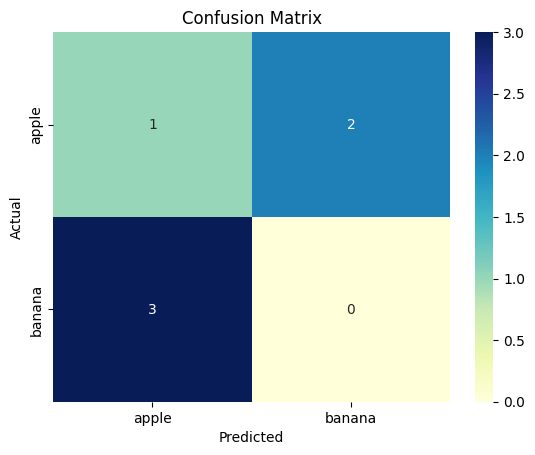


--- Regression Metrics ---
Mean Absolute Error: 335.75
Root Mean Squared Error: 410.25


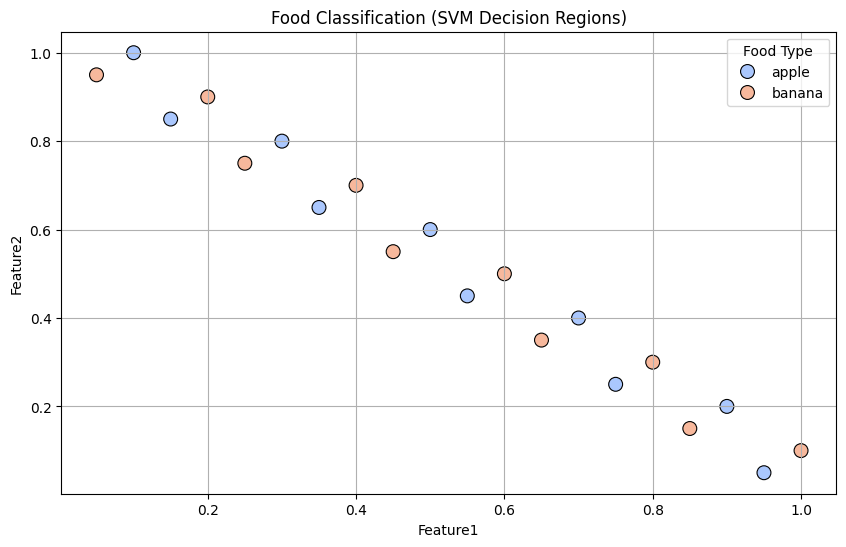

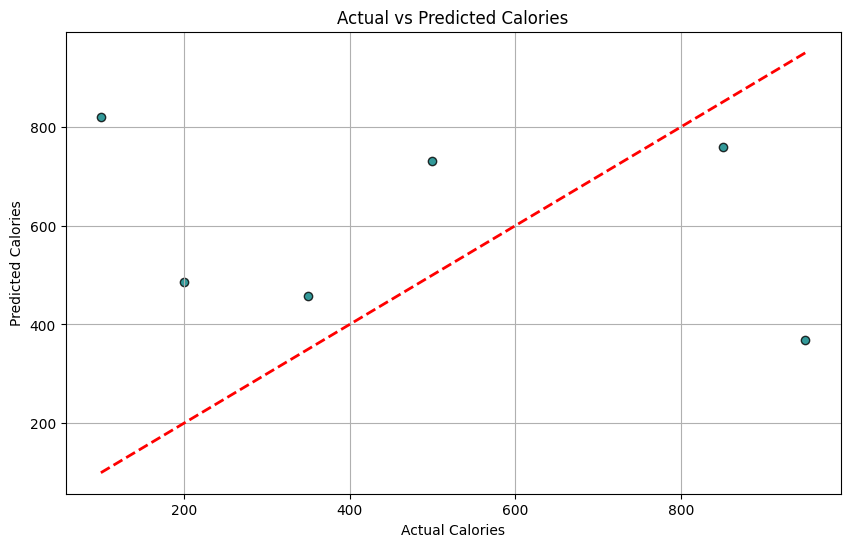

In [19]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Food Data
data = {
    'Feature1': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 0.05],
    'Feature2': [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1,
                 0.85, 0.75, 0.65, 0.55, 0.45, 0.35, 0.25, 0.15, 0.05, 0.95],
    'Calories': [100, 200, 150, 250, 300, 350, 400, 450, 500, 550,
                 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050],
    'Label': ['apple', 'banana'] * 10
}
df = pd.DataFrame(data)

# Feature & Target Separation
X = df[['Feature1', 'Feature2']]
y_class = df['Label']
y_reg = df['Calories']

# Split Data
X_train, X_test, y_class_train, y_class_test = train_test_split(
    X, y_class, test_size=0.3, random_state=42, stratify=y_class)
_, _, y_reg_train, y_reg_test = train_test_split(
    X, y_reg, test_size=0.3, random_state=42)

# SVM Classifier with Grid Search
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=0)
grid.fit(X_train, y_class_train)
model_class = grid.best_estimator_
print(f"Best SVM Parameters: {grid.best_params_}")

# Linear Regression Model
model_reg = LinearRegression()
model_reg.fit(X_train, y_reg_train)

# Predictions
y_class_pred = model_class.predict(X_test)
y_reg_pred = model_reg.predict(X_test)

# Classification Evaluation
print("\n--- Classification Metrics ---")
print(f"Accuracy: {accuracy_score(y_class_test, y_class_pred):.2f}")
print(classification_report(y_class_test, y_class_pred, zero_division=1))

# Confusion Matrix
conf_matrix = confusion_matrix(y_class_test, y_class_pred, labels=['apple', 'banana'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['apple', 'banana'],
            yticklabels=['apple', 'banana'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Regression Evaluation
print("\n--- Regression Metrics ---")
print(f"Mean Absolute Error: {mean_absolute_error(y_reg_test, y_reg_pred):.2f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_reg_test, y_reg_pred)):.2f}")

# Classification Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feature1', y='Feature2', hue='Label', data=df,
                palette='coolwarm', s=100, edgecolor='k')
plt.title('Food Classification (SVM Decision Regions)')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(title='Food Type')
plt.grid(True)
plt.show()

# Actual vs Predicted Calories Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_reg_test, y_reg_pred, color='teal', edgecolors='k', alpha=0.8)
plt.plot([min(y_reg_test), max(y_reg_test)],
         [min(y_reg_test), max(y_reg_test)], 'r--', lw=2)
plt.title('Actual vs Predicted Calories')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.grid(True)
plt.show()
